In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, LinearRegression
import xgboost as xg
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm

In [2]:
plt.style.use('ggplot')
sns.set_palette(palette='Set1')
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('Modeling_data.csv')

In [4]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 124 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          11440 non-null  int64  
 1   R                                   11440 non-null  float64
 2   Python                              11440 non-null  float64
 3   Julia                               11440 non-null  float64
 4   SQL                                 11440 non-null  float64
 5   Scala                               11440 non-null  float64
 6   JavaScript                          11440 non-null  float64
 7   Title_Machine                       11440 non-null  float64
 8   Title_Deep                          11440 non-null  float64
 9   Title_Analyst                       11440 non-null  float64
 10  Title_Engineer                      11440 non-null  float64
 11  Title_Scientist                     1144

# ? Does this makes a difference?

In [5]:
df = df.astype('category')
df.Avg_Salary = df.Avg_Salary.astype('float')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,R,Python,Julia,SQL,Scala,JavaScript,Title_Machine,Title_Deep,Title_Analyst,Title_Engineer,...,Southwest Research Institute,Leidos,Booz Allen Hamilton Inc,UC San Diego,Kforce Technology Staffing,Google,CyberCoders,Guidehouse,In_Headquarters,Avg_Salary
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,146000.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,146000.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,146000.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1.0,146000.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,146000.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Avg_Salary', axis=1), df.Avg_Salary, test_size=0.30, random_state=42)

# RandomForest

In [8]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.3400718066247146

In [9]:
mean_absolute_error(y_test, rf.predict(X_test))

21491.65088307536

In [10]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [5,50,100],
               'n_estimators': [50, 80, 100, 122]}
rf_random = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [11]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   36.2s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 50, 100],
                                        'n_estimators': [50, 80, 100, 122]},
                   random_state=42, verbose=2)

In [12]:
print(rf_random.best_params_)
print(rf_random.best_estimator_.score(X_test,y_test))
print(rf_random.best_estimator_)

{'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.40694808176414854
RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)


In [13]:
mean_absolute_error(y_test, rf_random.best_estimator_.predict(X_test))

20956.756584469742

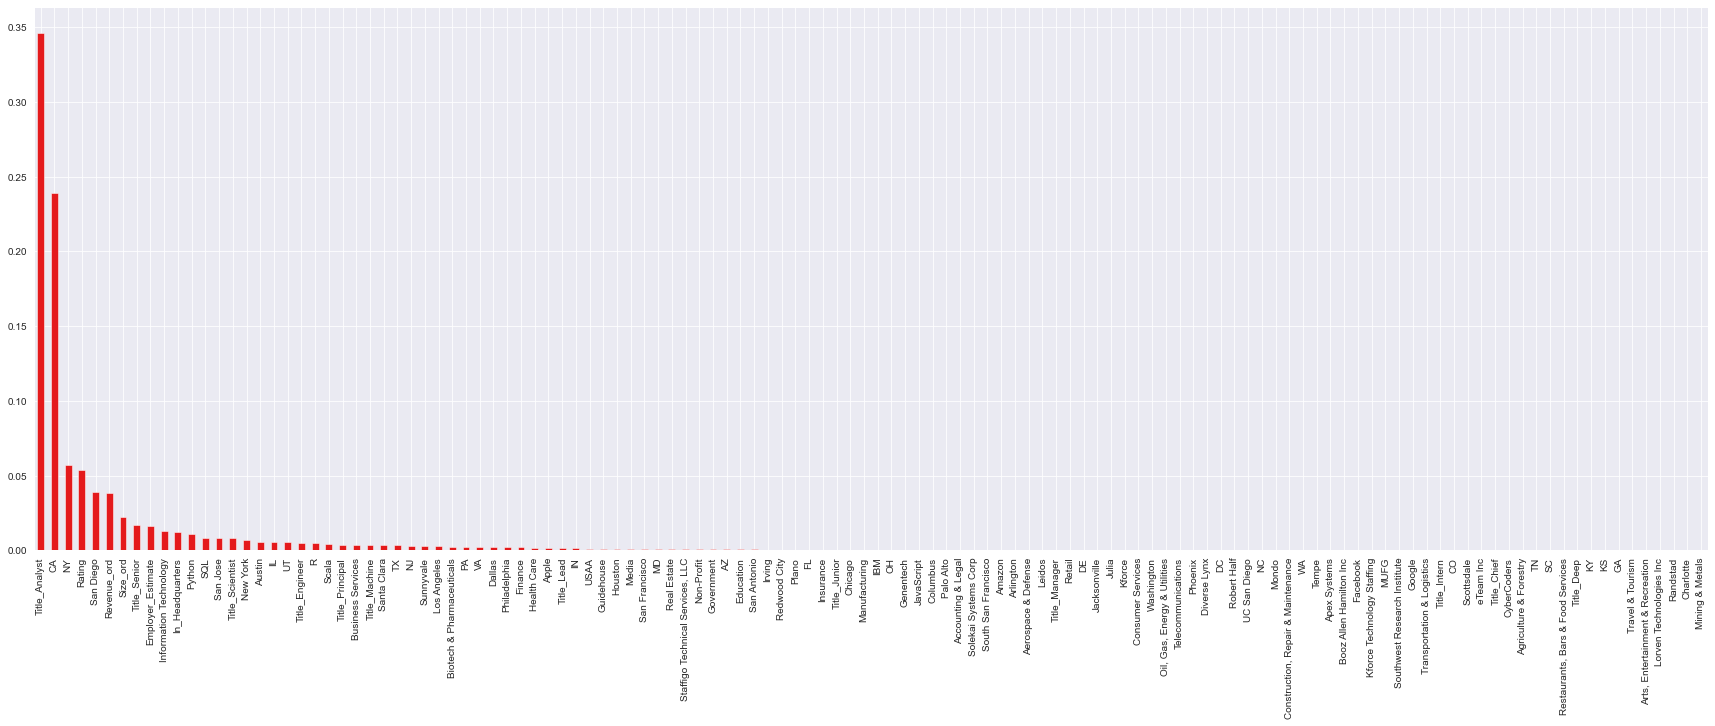

In [14]:
plt.figure(figsize=(30,10))
pd.Series(rf_random.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:200].plot(kind='bar')
plt.show()

In [15]:
pd.Series(rf_random.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)[pd.Series(rf_random.best_estimator_.feature_importances_, index=X_train.columns)==0].index

Index(['eTeam Inc', 'Title_Chief', 'CyberCoders', 'Agriculture & Forestry',
       'TN', 'SC', 'Restaurants, Bars & Food Services', 'Title_Deep', 'KY',
       'KS', 'GA', 'Travel & Tourism', 'Arts, Entertainment & Recreation',
       'Lorven Technologies Inc', 'Randstad', 'Charlotte', 'Mining & Metals'],
      dtype='object')

In [16]:
df_clean = df.copy()
df_clean.drop(columns = ['eTeam Inc', 'Title_Chief', 'CyberCoders', 'Agriculture & Forestry',
       'TN', 'SC', 'Restaurants, Bars & Food Services', 'Title_Deep', 'KY',
       'KS', 'GA', 'Travel & Tourism', 'Arts, Entertainment & Recreation',
       'Lorven Technologies Inc', 'Randstad', 'Charlotte', 'Mining & Metals'], inplace=True)

In [17]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df_clean.drop('Avg_Salary', axis=1), df_clean.Avg_Salary, test_size=0.30, random_state=42)

In [18]:
rf_clean = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_clean.fit(X_train_clean,y_train_clean)
rf_clean.score(X_test_clean,y_test_clean)

0.34169793744385146

In [19]:
mean_absolute_error(y_test_clean, rf_clean.predict(X_test_clean))

21493.165151664653

# Lasso

In [20]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
mean_absolute_error(y_test, lasso.predict(X_test))

21744.25522691714

# XGBoost

In [21]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 100, seed = 123)
xgb_r.fit(X_train,y_train)

mean_absolute_error(y_test, xgb_r.predict(X_test))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields R, Python, Julia, SQL, Scala, JavaScript, Title_Machine, Title_Deep, Title_Analyst, Title_Engineer, Title_Scientist, Title_Manager, Title_Senior, Title_Junior, Title_Lead, Title_Principal, Title_Chief, Title_Intern, Employer_Estimate, Size_ord, Revenue_ord, Rating, AZ, CA, CO, DC, DE, FL, GA, IL, IN, KS, KY, MD, NC, NJ, NY, OH, PA, SC, TN, TX, UT, VA, WA, Accounting & Legal, Aerospace & Defense, Agriculture & Forestry, Arts, Entertainment & Recreation, Biotech & Pharmaceuticals, Business Services, Construction, Repair & Maintenance, Consumer Services, Education, Finance, Government, Health Care, Information Technology, Insurance, Manufacturing, Media, Mining & Metals, Non-Profit, Oil, Gas, Energy & Utilities, Real Estate, Restaurants, Bars & Food Services, Retail, Telecommunications, Transportation & Logistics, Travel & Tourism, Austin, New York, Chicago, San Diego, Houston, San Antonio, Dallas, Philadelphia, Los Angeles, San Francisco, Phoenix, San Jose, Irving, Columbus, Plano, Tempe, Washington, Santa Clara, Sunnyvale, South San Francisco, Arlington, Scottsdale, Jacksonville, Palo Alto, Charlotte, Redwood City, Staffigo Technical Services, LLC, Apple, Amazon, Diverse Lynx, IBM, Kforce, Genentech, Solekai Systems Corp, Lorven Technologies Inc, Facebook, Apex Systems, Mondo, USAA, MUFG, Robert Half, Randstad, eTeam Inc, Southwest Research Institute, Leidos, Booz Allen Hamilton Inc, UC San Diego, Kforce Technology Staffing, Google, CyberCoders, Guidehouse, In_Headquarters

In [ ]:
params= {'n_estimators': [10,30,80,122],
    'learning_rate': [0.01,0.1,0.5,0.9],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

xgb_random = xg.XGBRegressor(objective ='reg:squarederror', seed = 123)
xgb_random = RandomizedSearchCV(xgb_random, params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(X_train,y_train)

In [ ]:
print(xgb_random.best_params_)
print(xgb_random.best_estimator_.score(X_test,y_test))
print(xgb_random.best_estimator_)

In [ ]:
mean_absolute_error(y_test, xgb_random.best_estimator_.predict(X_test))

# LinearRegression

In [22]:
reg = LinearRegression().fit(X_train_clean,y_train_clean)
mean_absolute_error(y_test_clean, reg.predict(X_test_clean))

21752.663843061993

In [23]:
pd.Series(rf_random.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:11].index

Index(['Title_Analyst', 'CA', 'NY', 'Rating', 'San Diego', 'Revenue_ord',
       'Size_ord', 'Title_Senior', 'Employer_Estimate',
       'Information Technology', 'In_Headquarters'],
      dtype='object')

In [24]:
reg_clean = LinearRegression()
reg_clean.fit(X_train[['Title_Analyst', 'CA', 'NY', 'Rating', 'San Diego', 'Revenue_ord',
       'Size_ord', 'Title_Senior', 'Employer_Estimate',
       'Information Technology', 'In_Headquarters']],y_train)
mean_absolute_error(y_test, reg_clean.predict(X_test[['Title_Analyst', 'CA', 'NY', 'Rating', 'San Diego', 'Revenue_ord',
       'Size_ord', 'Title_Senior', 'Employer_Estimate',
       'Information Technology', 'In_Headquarters']]))

22230.323237450226

In [25]:
X_train[['Title_Analyst', 'CA', 'NY', 'Rating', 'San Diego', 'Revenue_ord',
       'Size_ord', 'Title_Senior', 'Employer_Estimate',
       'Information Technology', 'In_Headquarters']]

,Title_Analyst,CA,NY,Rating,San Diego,Revenue_ord,Size_ord,Title_Senior,Employer_Estimate,Information Technology,In_Headquarters
8367,0.0,0,0,3.5,0,11.0,5.0,0.0,0.0,0,0.0
7217,1.0,0,0,3.1,0,5.0,2.0,0.0,0.0,0,0.0
1127,0.0,0,0,3.3,0,7.0,4.0,0.0,0.0,0,0.0
6023,1.0,0,0,5.0,0,5.0,1.0,0.0,0.0,1,0.0
6784,1.0,0,0,3.4,0,10.0,4.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,1,0,5.0,0,6.0,3.0,1.0,0.0,0,0.0
5191,1.0,0,0,2.9,0,5.0,2.0,0.0,0.0,0,0.0
5390,1.0,1,0,4.1,0,4.0,1.0,0.0,0.0,1,0.0
860,0.0,0,0,3.3,0,10.0,5.0,0.0,0.0,0,0.0


In [26]:
pipe = make_pipeline(
    SelectKBest(f_classif),
    LinearRegression()
)

In [27]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

lr_random = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

lr_random.fit(X_train, y_train)

D:\Desktop\Springboard_Data_Science\Enviroments\pandas-profiling\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [28]:
lr_random.best_estimator_.score(X_test,y_test)

0.3852452359705886

In [29]:
mean_absolute_error(y_test, lr_random.best_estimator_.predict(X_test))

21688.799627935427

In [41]:
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Avg_Salary   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     43.29
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:50:34   Log-Likelihood:                -93210.
No. Observations:                8008   AIC:                         1.867e+05
Df Residuals:                    7887   BIC:                         1.875e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                7.66e+04   3417.602     22.414      0.000    6.99e+04    8.33e+04
R                                    277.9529    941.206      0.295      0.768   -1567.061    2122.967
Python                              2958.6309    859.148      3.444      0.001    1274.473    4642.789
Julia                               4451.2037   5622.626      0.792      0.429   -6570.632    1.55e+04
SQL                                 1570.0485    714.628      2.197      0.028     169.188    2970.909
Scala                                -96.8009    943.290     -0.103      0.918   -1945.900    1752.298
JavaScript                         -1350.9833   1704.778     -0.792      0.428   -4692.800    1990.834
Title_Machine                       8478.0060   2161.298      3.923      0.000    4241.289    1.27e+04
Title_Deep                         -8107.3792   8825.840     -0.919      0.358   -2.54e+04    9193.605
Title_Analyst                      -2.148e+04   1290.201    -16.650      0.000    -2.4e+04    -1.9e+04
Title_Engineer                      1855.6817   1379.500      1.345      0.179    -848.503    4559.867
Title_Scientist                     9522.3870   1334.761      7.134      0.000    6905.902    1.21e+04
Title_Manager                       -679.3220   2372.909     -0.286      0.775   -5330.852    3972.208
Title_Senior                        3199.4264    864.851      3.699      0.000    1504.089    4894.764
Title_Junior                       -3516.0720   2534.145     -1.387      0.165   -8483.668    1451.524
Title_Lead                          3455.0226   2031.753      1.701      0.089    -527.752    7437.797
Title_Principal                     6807.9666   2577.306      2.642      0.008    1755.765    1.19e+04
Title_Chief                         4959.3704   9893.485      0.501      0.616   -1.44e+04    2.44e+04
Title_Intern                        4673.0768   4326.897      1.080      0.280   -3808.787    1.32e+04
Employer_Estimate                   2.575e+04   3611.271      7.129      0.000    1.87e+04    3.28e+04
Size_ord                            -874.0008    393.912     -2.219      0.027   -1646.173    -101.829
Revenue_ord                          483.7907    216.789      2.232      0.026      58.827     908.755
Rating                              1471.3491    565.715      2.601      0.009     362.398    2580.301
AZ                                  9632.4067   4314.930      2.232      0.026    1174.002    1.81e+04
CA                                  2.996e+04   2579.558     11.615      0.000    2.49e+04     3.5e+04
CO                                  8129.2108   3995.982      2.034      0.042     296.028     1.6e+04
DC                                  1958.8614   1831.601      1.069      0.285   -1631.562    55

### Dumping Cities, States and Companies

In [30]:
df_new = df.iloc[:,:22].copy()
df_new['Avg_Salary'] = df.Avg_Salary

In [31]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new.drop('Avg_Salary', axis=1), df_new.Avg_Salary, test_size=0.30, random_state=42)

# RandomForest

In [32]:
rf_new = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_new.fit(X_train_new,y_train_new)
rf_new.score(X_test_new,y_test_new)

0.1246373612265026

In [33]:
mean_absolute_error(y_test_new, rf_new.predict(X_test_new))

25341.723969384773

In [34]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [5,50,100],
               'n_estimators': [5,10,15,20,22]}
rf_random_new = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_random_new = RandomizedSearchCV(estimator = rf_random_new, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [35]:
rf_random_new.fit(X_train_new,y_train_new)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.5s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 50, 100],
                                        'n_estimators': [5, 10, 15, 20, 22]},
                   random_state=42, verbose=2)

In [36]:
print(rf_random_new.best_params_)
print(rf_random_new.best_estimator_.score(X_test_new,y_test_new))
print(rf_random_new.best_estimator_)

{'n_estimators': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
0.23549938205405663
RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=5, n_estimators=20, n_jobs=-1,
                      random_state=42)


In [37]:
mean_absolute_error(y_test_new, rf_random_new.best_estimator_.predict(X_test_new))

24223.919590144145

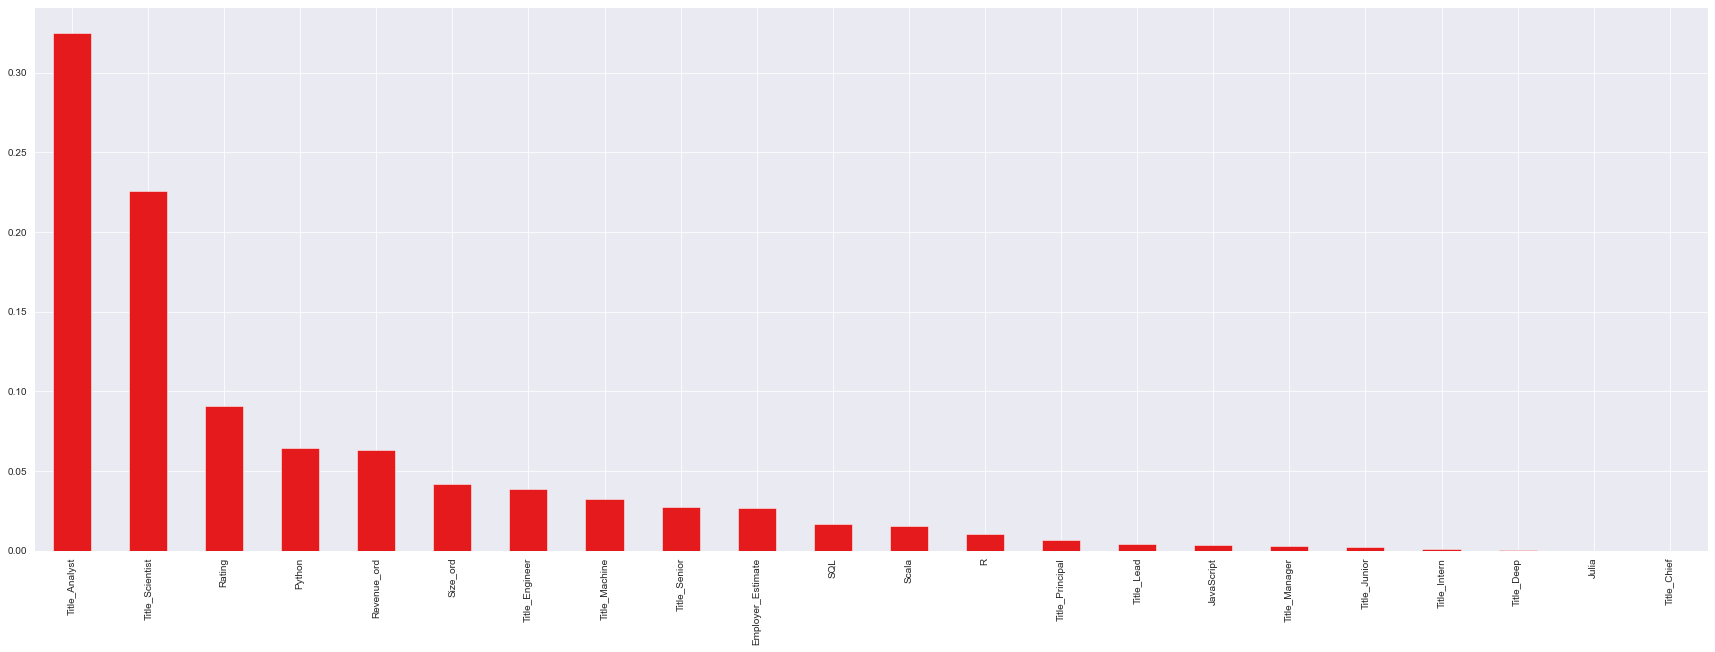

In [38]:
plt.figure(figsize=(30,10))
pd.Series(rf_random_new.best_estimator_.feature_importances_, index=X_train_new.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

<AxesSubplot:>

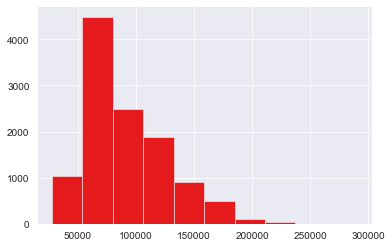

In [44]:
df.Avg_Salary.hist()